In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset1 = pd.read_csv('Social_Network_Ads.csv')

X1 = dataset1.iloc[:,[2,3]].values
Y1 = dataset1.iloc[:,4].values

from sklearn.model_selection import train_test_split 
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,test_size=0.25,random_state=0) 

In [2]:
from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
X_train1 = sc_X1.fit_transform(X_train1)
X_test1 = sc_X1.transform(X_test1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [3]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
classifier.fit(X_train1,Y_train1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [4]:
y_pred = classifier.predict(X_test1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test1,y_pred)
cm

array([[62,  6],
       [ 3, 29]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


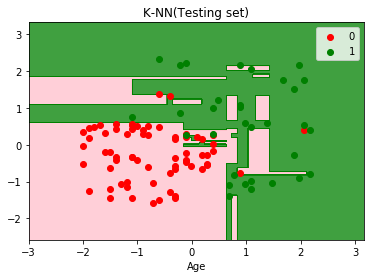

In [7]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_test1,Y_test1
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('pink','green')))
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN(Testing set)')
plt.xlabel('Age')
plt.legend('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


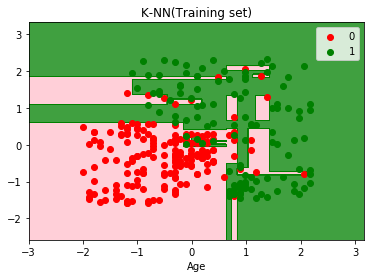

In [6]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train1,Y_train1
X1,X2 = np.meshgrid(np.arange(start=X_set[:,0].min()-1,stop=X_set[:,0].max()+1,step=0.01),
                    np.arange(start=X_set[:,1].min()-1,stop=X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap=ListedColormap(('pink','green')))
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title('K-NN(Training set)')
plt.xlabel('Age')
plt.legend('Estimated Salary')
plt.legend()
plt.show()